In [12]:
import numpy as np
# the pylab combine the pyplot and numpy, which can calculate with numpy and plot with pyplot
from pylab import plot, legend, concatenate, normal, hist, exp, sqrt, diag
from scipy.optimize import curve_fit
import scipy.io as sio

# https://www.coder.work/article/347314

[ 6.52016914e-01  1.87826767e-01  5.82783965e+04 -2.84779772e+00
 -3.52154091e+00  4.16815542e+03] 
 [1.70569325e-02 1.19624290e-02 2.79052866e+03 3.67942387e-01
 3.77078597e-01 3.15435956e+02]


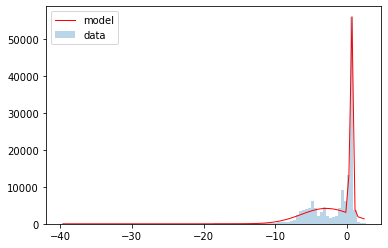

In [16]:


data = sio.loadmat(r'D:\OneDrive - stu.xmu.edu.cn\4 Code\1 M File\Shallow_bathymetry_global\Data\Match_CZI_IS2\test.mat')
data = np.array(data['H'])

# data=concatenate((normal(1,.2,5000),normal(2,.2,2500)))
y,x,_=hist(data,100,alpha=.3,label='data')


x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

expected = (1,.2,250,2,.2,125) # init parameter value
params,cov = curve_fit(bimodal,x,y,expected)
sigma = sqrt(diag(cov))
plot(x,bimodal(x,*params),color='red',lw=1,label='model')
legend()
print(params,'\n',sigma) 